Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [X] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [X] Get your validation accuracy score.
- [X] Get and plot your feature importances.
- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [X] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [X] Add your own stretch goal(s) ! (Tried several different hyperparameters in an iterative fashion)
- [X] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Try other [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```



In [79]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.0)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge
 * branch            master     -> FETCH_HEAD
Already up to date.


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [81]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [82]:
train_features = train.drop('status_group', axis = 'columns')
train_labels = train['status_group']
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [83]:
train_labels.head()


0        functional
1        functional
2        functional
3    non functional
4        functional
Name: status_group, dtype: object

In [0]:
# Splitting data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, train_size = .8, test_size = .2, stratify = train_labels)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size = .75, test_size = .25, stratify = y_train)

In [85]:
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
48820,21750,50.0,2011-03-18,Action Aid,-25,Da,38.897366,-6.434612,Maria Matei,0,Wami / Ruvu,Kisutu,Pwani,6,1,Bagamoyo,Magomeni,60,True,GeoData Consultants Ltd,Company,Bagamoyo wate,True,2009,ksb,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
35391,20837,1000.0,2013-02-15,Qwiqwi,1438,District Council,37.957156,-4.392952,Kwa Mzee Neza Kikuru,0,Pangani,Pujini,Kilimanjaro,3,3,Same,Mpinji,70,True,GeoData Consultants Ltd,VWC,QWIQWI,True,2008,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
37146,68424,0.0,2011-03-10,Donor,260,WU,38.286607,-6.454886,Shuleni Moleto,0,Wami / Ruvu,Nadanya,Pwani,6,1,Bagamoyo,Lugoba,100,False,GeoData Consultants Ltd,WUA,Chalinze wate,True,2010,ksb,submersible,submersible,parastatal,parastatal,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
42857,63321,0.0,2011-02-15,Plan Int,229,T. N. karugendo,38.972999,-7.042272,Sungwi Primary School 1,0,Wami / Ruvu,Songwe Mjini,Pwani,60,33,Kisarawe,Masaki,1,True,GeoData Consultants Ltd,Private operator,Rain water,True,2007,mono,mono,motorpump,private operator,commercial,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
47096,19348,0.0,2011-03-09,Lvia,0,LVIA,35.867434,-6.311339,Musa,0,Rufiji,Lusinde,Dodoma,1,4,Chamwino,Muungano,0,True,GeoData Consultants Ltd,VWC,Muun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [86]:
y_train.head()

48820        functional
35391    non functional
37146        functional
42857    non functional
47096        functional
Name: status_group, dtype: object

In [0]:
# Defining feature engineering function
import datetime
import numpy as np

def engineer(df):
#   Making age variable
  df.date_recorded = pd.to_datetime(df.date_recorded)
  df.construction_year.replace(0,np.NaN, inplace = True)
  mean_year = np.nanmean(df.construction_year)
  df.construction_year.replace(np.NaN,mean_year, inplace = True)
  df['age'] = df.date_recorded.dt.year - df.construction_year
#   Adding month_recorded feature
  for month in range(1,13):
    df[f'month_recorded_{month}'] = (df.date_recorded.dt.month==month)
#   Making region code categorical instead of numeric
  df['region_code'] = pd.Categorical(df.region_code)
  return df

In [0]:
def drop_high_cardinality(df):
  cardinality= [[],[]]
  for column in df.select_dtypes(exclude = 'number').columns:
    cardinality[0].append(column)
    cardinality[1].append(df[column].nunique())
  cardinality = pd.DataFrame(cardinality).T
  cardinality
  cardinality_50 = cardinality[cardinality[1]>51].copy()
  cardinality_50
  features = df.drop(list(cardinality_50[0]), axis = 'columns').columns.copy()
  return df[features]

In [89]:
# Applying functions
X_train = drop_high_cardinality(engineer(X_train))
X_val = drop_high_cardinality(engineer(X_val))
X_test = drop_high_cardinality(engineer(X_test))
                              


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [96]:
# Making pipeline and fitting basic decision tree
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pipeline = make_pipeline(ce.OneHotEncoder(use_cat_names = True)
              ,IterativeImputer()
              ,StandardScaler()
              ,DecisionTreeClassifier())
pipeline.fit(X_train, y_train)
print(pipeline.score(X_val,y_val))

0.7324074074074074


In [98]:
# trying different max_depths

for max_depth in range(1,25):
  dt = make_pipeline(ce.OneHotEncoder(use_cat_names = True)
      ,IterativeImputer()
      ,StandardScaler()
      ,DecisionTreeClassifier(max_depth = max_depth))
  
  dt.fit(X_train,y_train)
  train_score = dt.score(X_train,y_train)
  val_score = dt.score(X_val, y_val)
  print('Max Depth: ', max_depth)
  print('Train Accuracy', train_score)
  print('Validation Accuracy', val_score)
  print()

Max Depth:  1
Train Accuracy 0.6421156004489338
Validation Accuracy 0.6406565656565657

Max Depth:  2
Train Accuracy 0.6938271604938272
Validation Accuracy 0.6922558922558922

Max Depth:  3
Train Accuracy 0.6961560044893378
Validation Accuracy 0.6958754208754209

Max Depth:  4
Train Accuracy 0.7094276094276094
Validation Accuracy 0.7075757575757575

Max Depth:  5
Train Accuracy 0.7175925925925926
Validation Accuracy 0.7166666666666667

Max Depth:  6
Train Accuracy 0.7214365881032547
Validation Accuracy 0.7193602693602693

Max Depth:  7
Train Accuracy 0.7316217732884399
Validation Accuracy 0.7313973063973064

Max Depth:  8
Train Accuracy 0.7404040404040404
Validation Accuracy 0.7372053872053872

Max Depth:  9
Train Accuracy 0.7501122334455668
Validation Accuracy 0.7390572390572391

Max Depth:  10
Train Accuracy 0.7635802469135803
Validation Accuracy 0.7434343434343434

Max Depth:  11
Train Accuracy 0.7741863075196409
Validation Accuracy 0.7459595959595959

Max Depth:  12
Train Accuracy 

KeyboardInterrupt: ignored

In [101]:
# Best max_depth was 15, trying that with different min, samples per leaf

for min_samples_leaf in range(1,100,5):
  dt = make_pipeline(ce.OneHotEncoder(use_cat_names = True)
      ,IterativeImputer()
      ,StandardScaler()
      ,DecisionTreeClassifier(max_depth = 15, min_samples_leaf = min_samples_leaf))
  
  dt.fit(X_train,y_train)
  train_score = dt.score(X_train,y_train)
  val_score = dt.score(X_val, y_val)
  print('Min samples/leaf: ', min_samples_leaf)
  print('Train Accuracy', train_score)
  print('Validation Accuracy', val_score)
  print()



Min samples/leaf:  1
Train Accuracy 0.8365039281705948
Validation Accuracy 0.7661616161616162

Min samples/leaf:  6
Train Accuracy 0.8081649831649832
Validation Accuracy 0.7646464646464647

Min samples/leaf:  11
Train Accuracy 0.7964646464646464
Validation Accuracy 0.7620370370370371

Min samples/leaf:  16
Train Accuracy 0.7887205387205387
Validation Accuracy 0.7628787878787879

Min samples/leaf:  21
Train Accuracy 0.7839506172839507
Validation Accuracy 0.7617003367003367

Min samples/leaf:  26
Train Accuracy 0.7795454545454545
Validation Accuracy 0.7597643097643098

Min samples/leaf:  31
Train Accuracy 0.776010101010101
Validation Accuracy 0.7568181818181818

Min samples/leaf:  36
Train Accuracy 0.7723905723905724
Validation Accuracy 0.7531986531986532

Min samples/leaf:  41
Train Accuracy 0.7688832772166105
Validation Accuracy 0.7537037037037037

Min samples/leaf:  46
Train Accuracy 0.7654040404040404
Validation Accuracy 0.7498316498316498

Min samples/leaf:  51
Train Accuracy 0.7637

In [103]:
# Testing again with lower numbers
for min_samples_leaf in range(1,20,1):
  dt = make_pipeline(ce.OneHotEncoder(use_cat_names = True)
      ,IterativeImputer()
      ,StandardScaler()
      ,DecisionTreeClassifier(max_depth = 15, min_samples_leaf = min_samples_leaf))
  
  dt.fit(X_train,y_train)
  train_score = dt.score(X_train,y_train)
  val_score = dt.score(X_val, y_val)
  print('Min samples/leaf: ', min_samples_leaf)
  print('Train Accuracy', train_score)
  print('Validation Accuracy', val_score)
  print()


Min samples/leaf:  1
Train Accuracy 0.8365039281705948
Validation Accuracy 0.7659090909090909

Min samples/leaf:  2
Train Accuracy 0.8267115600448933
Validation Accuracy 0.7648989898989899

Min samples/leaf:  3
Train Accuracy 0.822334455667789
Validation Accuracy 0.7630471380471381

Min samples/leaf:  4
Train Accuracy 0.8164983164983165
Validation Accuracy 0.7609427609427609

Min samples/leaf:  5
Train Accuracy 0.8119248035914702
Validation Accuracy 0.7622053872053872

Min samples/leaf:  6
Train Accuracy 0.8080527497194164
Validation Accuracy 0.7645622895622896

Min samples/leaf:  7
Train Accuracy 0.8054713804713804
Validation Accuracy 0.7651515151515151

Min samples/leaf:  8
Train Accuracy 0.8030022446689113
Validation Accuracy 0.7648989898989899

Min samples/leaf:  9
Train Accuracy 0.800280583613917
Validation Accuracy 0.7654040404040404

Min samples/leaf:  10
Train Accuracy 0.7982603815937149
Validation Accuracy 0.7643097643097643

Min samples/leaf:  11
Train Accuracy 0.796520763187

In [106]:
# Testing tree depth again with min_samples_leaf = 9
for max_depth in range(3,40):
  dt = make_pipeline(ce.OneHotEncoder(use_cat_names = True)
      ,IterativeImputer()
      ,StandardScaler()
      ,DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = 9))  
  dt.fit(X_train,y_train)
  train_score = dt.score(X_train,y_train)
  val_score = dt.score(X_val, y_val)
  print('Max Depth: ', max_depth)
  print('Train Accuracy', train_score)
  print('Validation Accuracy', val_score)
  print()

Max Depth:  3
Train Accuracy 0.6961279461279462
Validation Accuracy 0.695959595959596

Max Depth:  4
Train Accuracy 0.7094556677890012
Validation Accuracy 0.7077441077441078

Max Depth:  5
Train Accuracy 0.7174803591470258
Validation Accuracy 0.7167508417508418

Max Depth:  6
Train Accuracy 0.7209876543209877
Validation Accuracy 0.7194444444444444

Max Depth:  7
Train Accuracy 0.7306116722783389
Validation Accuracy 0.7318181818181818

Max Depth:  8
Train Accuracy 0.7380751964085297
Validation Accuracy 0.7377104377104378

Max Depth:  9
Train Accuracy 0.7455106621773289
Validation Accuracy 0.7379629629629629

Max Depth:  10
Train Accuracy 0.7551907968574635
Validation Accuracy 0.7423400673400673

Max Depth:  11
Train Accuracy 0.7620650953984287
Validation Accuracy 0.7434343434343434

Max Depth:  12
Train Accuracy 0.7745230078563412
Validation Accuracy 0.7536195286195286

Max Depth:  13
Train Accuracy 0.7821268237934904
Validation Accuracy 0.75496632996633

Max Depth:  14
Train Accuracy 0

In [107]:
# The best hyperparameters so far look like Max depth = 19, min samples per leaf = 9
dt = make_pipeline(ce.OneHotEncoder(use_cat_names = True)
    ,IterativeImputer()
    ,StandardScaler()
    ,DecisionTreeClassifier(max_depth = 19, min_samples_leaf = 9))  
dt.fit(X_train,y_train)
train_score = dt.score(X_train,y_train)
val_score = dt.score(X_val, y_val)
print('Max Depth: ', max_depth)
print('Train Accuracy', train_score)
print('Validation Accuracy', val_score)

Max Depth:  39
Train Accuracy 0.8218855218855219
Validation Accuracy 0.7675084175084175


In [110]:
dir(dt.named_steps)

['decisiontreeclassifier',
 'iterativeimputer',
 'onehotencoder',
 'standardscaler']

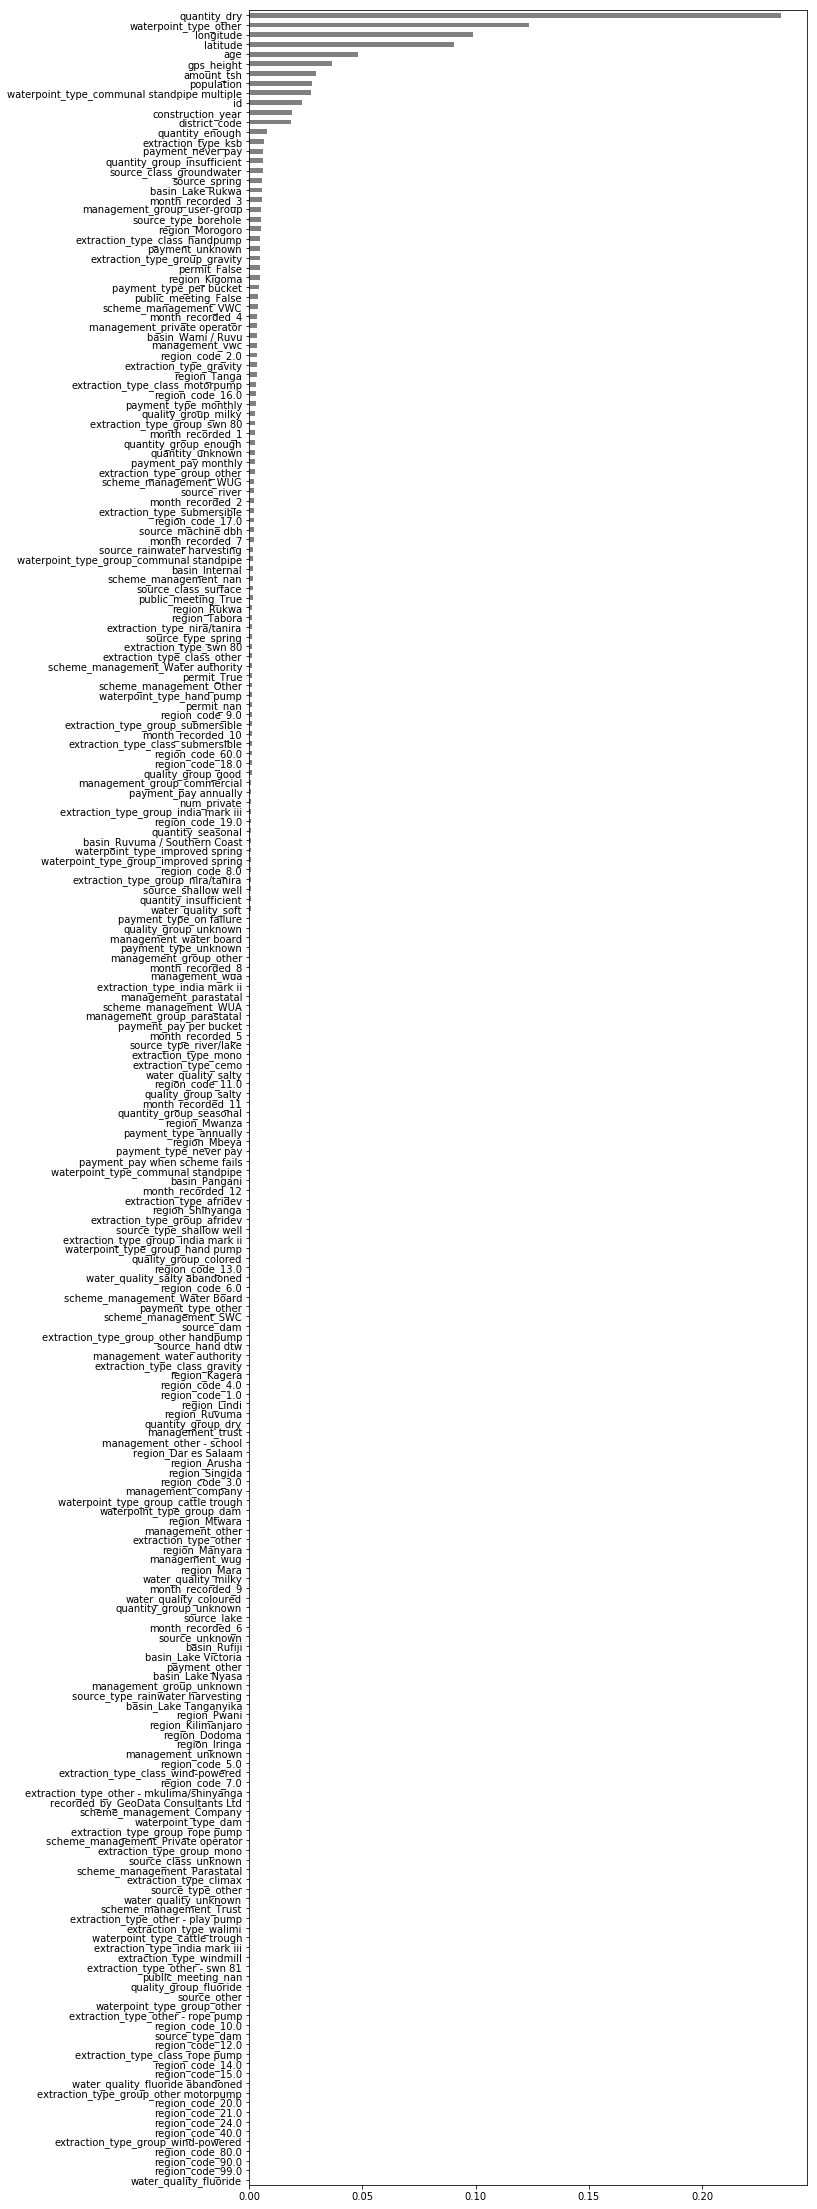

In [115]:
# plotting feature importances
import matplotlib.pyplot as plt

encoder = dt.named_steps['onehotencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(dt.named_steps.decisiontreeclassifier.feature_importances_, encoded_columns)
plt.figure(figsize = (10,40))
importances.sort_values().plot.barh(color = 'gray');

In [116]:
# Getting output file

test = drop_high_cardinality(engineer(test))

y_pred = dt.predict(test)

array(['functional needs repair', 'functional', 'functional needs repair',
       ..., 'functional', 'functional', 'non functional'], dtype=object)

In [117]:
y_pred.shape

(14358,)

In [118]:
y_pred = pd.Series(y_pred)
submission = y_pred.to_frame()

submission['status_group'] = submission[0]
submission[0] = test['id']
submission.columns = ['id', 'status_group']
submission.head()

,id,status_group
0,50785,functional needs repair
1,51630,functional
2,17168,functional needs repair
3,45559,non functional
4,49871,functional


In [0]:
submission.to_csv('submission5.csv', index = False)

from google.colab import files

files.download('submission5.csv')